In [69]:
# %load "include.py"
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False 
#한글 폰트 사용시 마이너스 폰트 깨짐 해결



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   


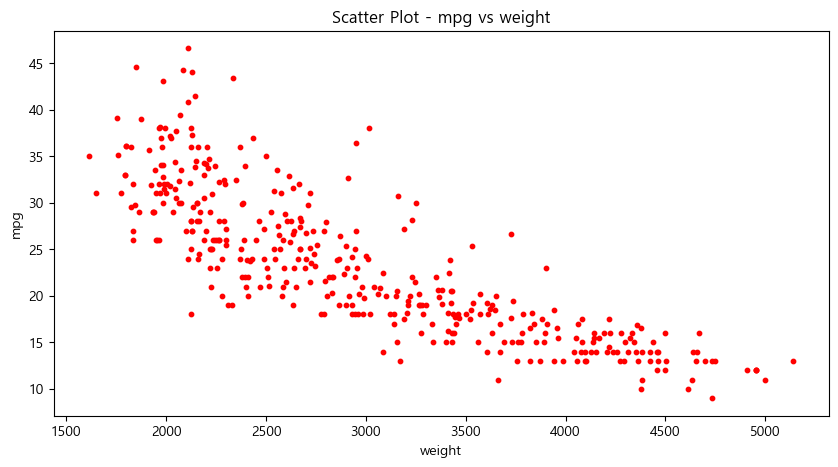

In [70]:
# auto-mpg.csv 파일읽어오기
# plt.style.use('default') <- 스타일 고정
df = pd.read_csv('./dataset/auto-mpg.csv',header=None)

# 컬럼명지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 정보 확인
print(df.info())

# 누락데이터 삭제
nan_col_names = list(df.columns[ df.isnull().sum() > 0 ])

for i in df.columns:
    df[i].replace('?',np.nan, inplace = True)

for i in df.columns:
    df1 = df.dropna(subset = [i], how = 'any', axis = 0,inplace = True)
#      df.dropna()라는 함수를 수행함, df.dropna() 리턴값 없음, df1 = None이됨
#      df.dropna()은 바로 df의 값을 변경 결과를 보고싶으면 df 확인
#      위 상황에서 df1은 의미 없음
print(df)
# weight, mpg의 scatter 그래프작성
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c='red',s=10,
        figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

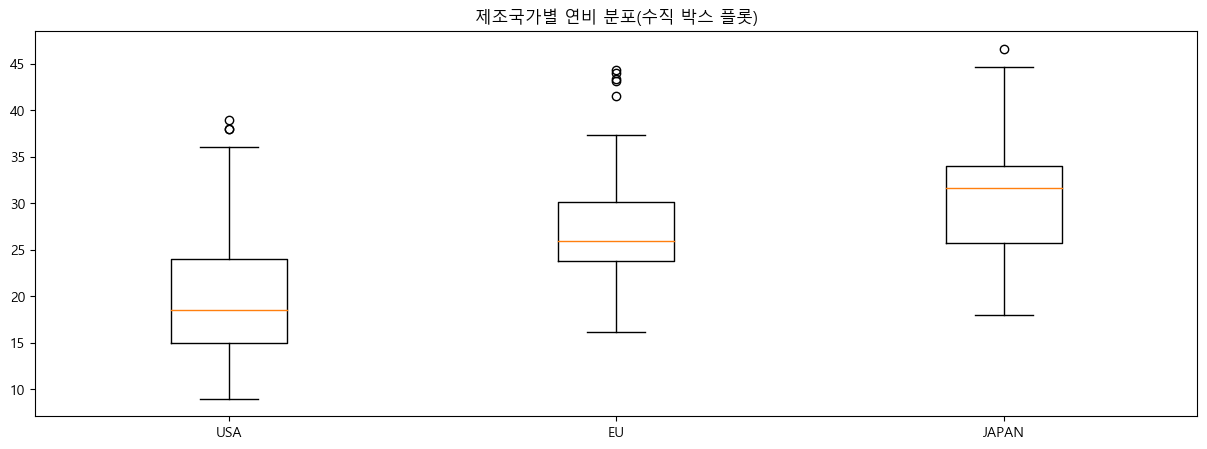

In [71]:
# 제조국 국가별 npg를 box.plot으로 표현
fig = plt.figure(figsize=(15, 5))
# ax = fig.add_subplot(1,1,1)
plt.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
          labels=['USA', 'EU', 'JAPAN'])
plt.title('제조국가별 연비 분포(수직 박스 플롯)')
plt.show()
# 중복데이를 제거 (행제거)
df.drop_duplicates(inplace=True)
# 제조국가가 1 -> USA 2-> EU 3->JPN으로 컬럼의 값 변경
df.origin.replace({1:'USA', 2:'EU', 3:'JPN'}, inplace = True)

In [63]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,EU,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,USA,ford ranger
